In [1]:
import pandas as pd
import scanpy as sc

In [2]:
adata = "/Users/jamesbolepan/Documents/research_LiverStress_Immune/rds_manual_extract/liver_liveTissue_RNA.h5ad"
adata = sc.read_h5ad(adata)
adata

AnnData object with n_obs × n_vars = 23819 × 19413
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_name', 'exp', 'diet', 'age', 'organ', 'mouse_number', 'mouse_and_organ', 'percent.mt', 'celltypes_NicheNet', 'celltypes_figure2plot', 'Age.Diet'

In [3]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


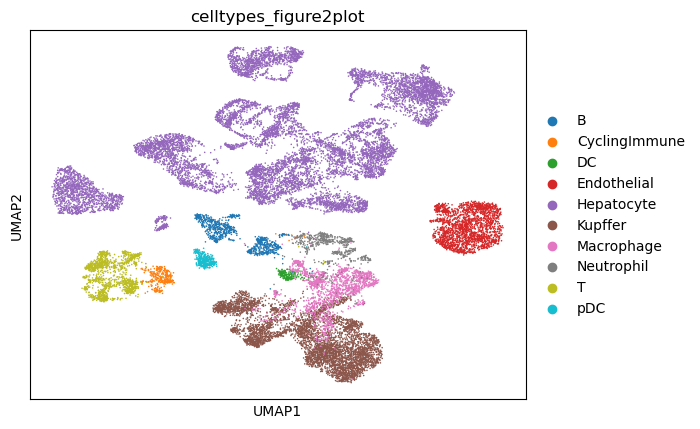

In [6]:
# Plotting the UMAP
sc.pl.umap(adata, color=["celltypes_figure2plot"])

let's do Leidan clustering

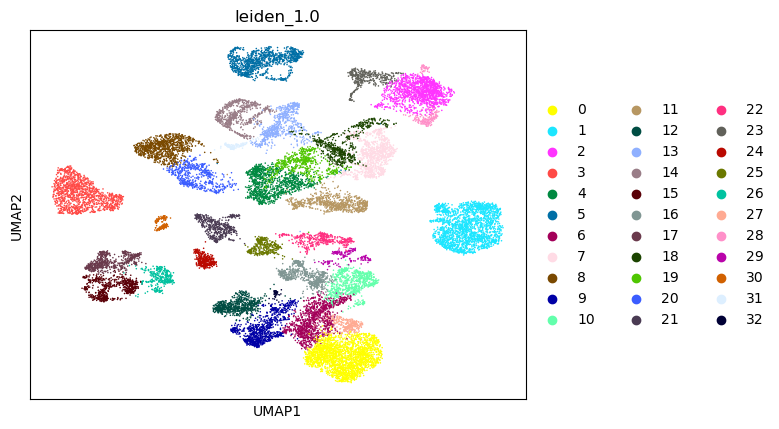

In [15]:
sc.tl.leiden(adata, resolution=1.0, key_added="leiden_1.0")
sc.pl.umap(adata, color=["leiden_1.0"])

We are not sure how good this resolution is. We might consider other resolutions later. 

We will the get marker genes

In [16]:
sc.tl.rank_genes_groups(adata, groupby="leiden_1.0", method="t-test")

/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages

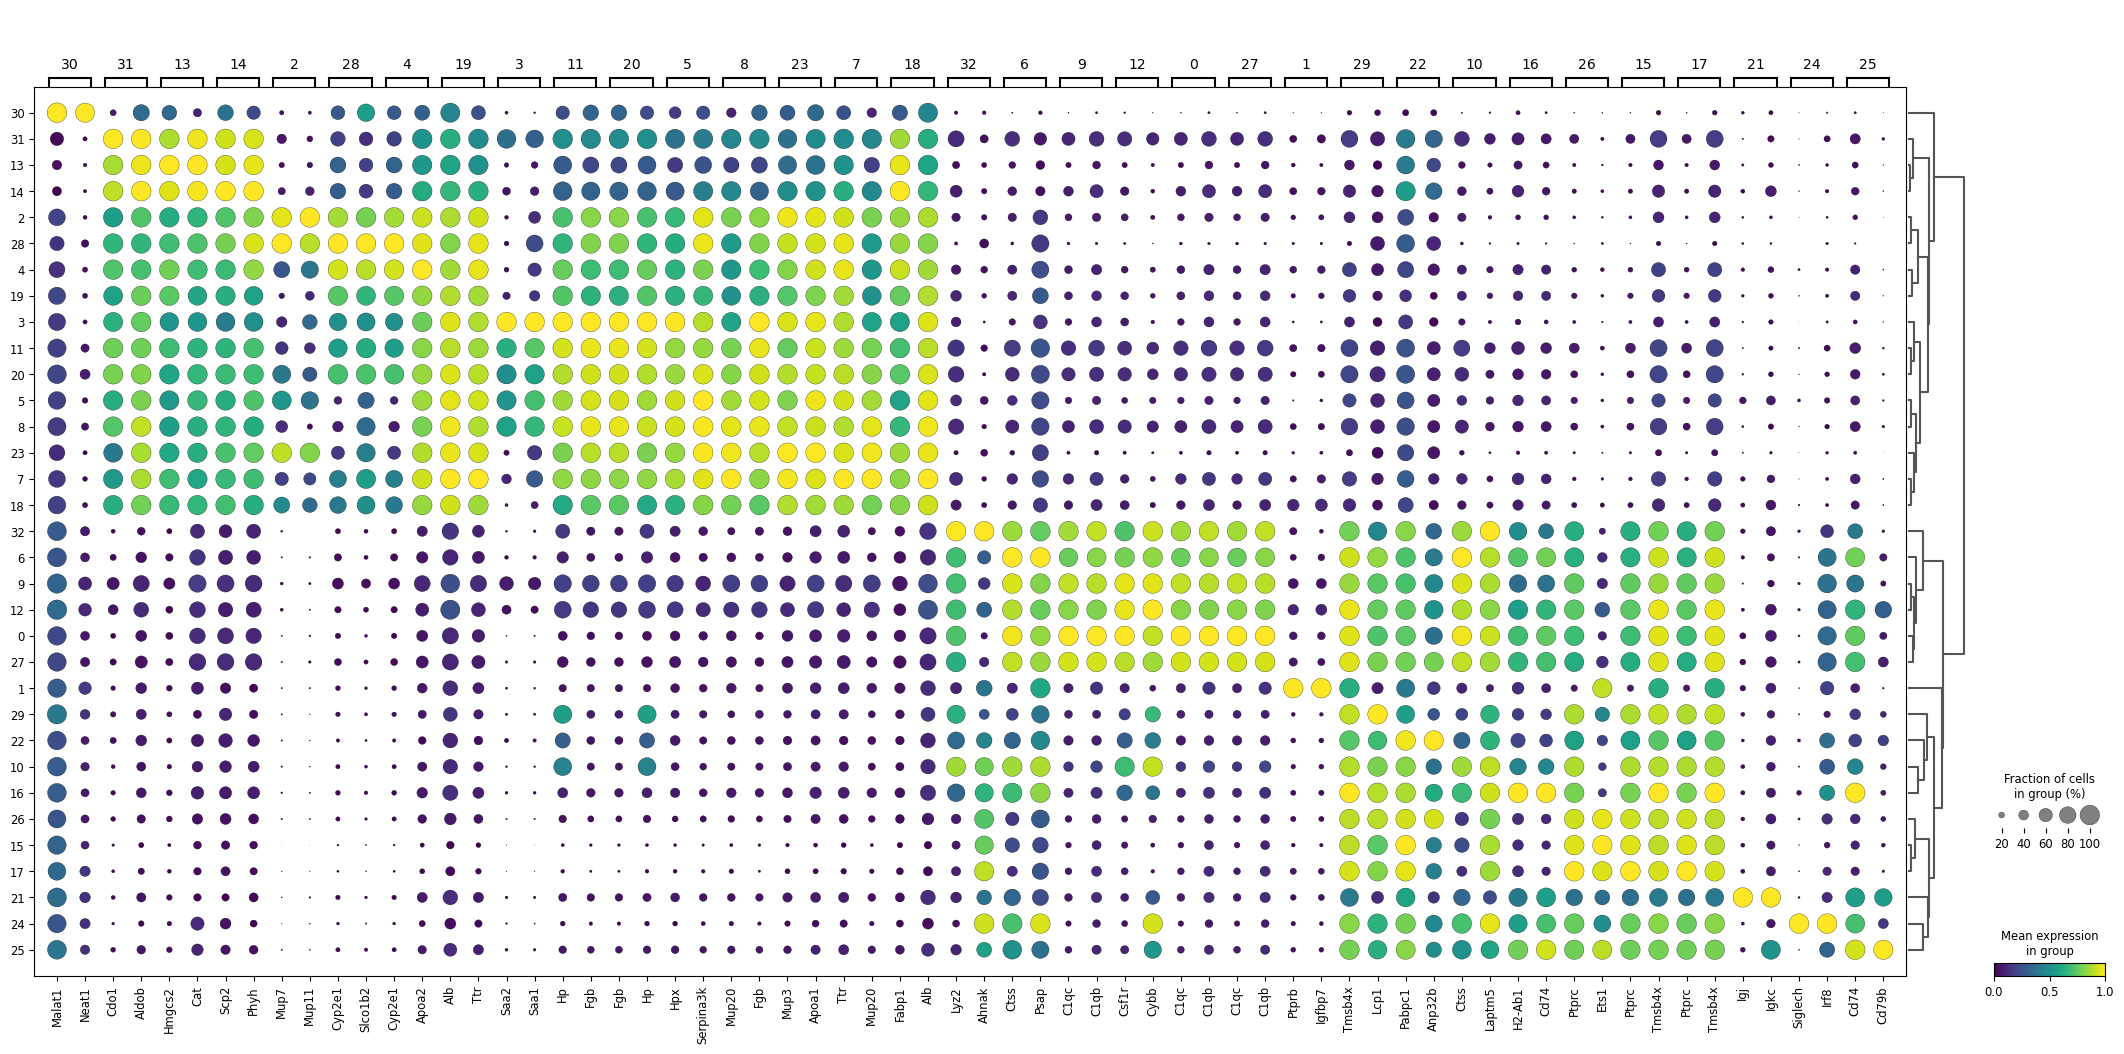

In [17]:
sc.pl.rank_genes_groups_dotplot(adata, groupby="leiden_1.0", n_genes=2, dendrogram=True, standard_scale="var", cmap="viridis")